<a href="https://colab.research.google.com/github/gitcnk/Logistic_Regression/blob/main/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [9]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


`geom_smooth()` using formula = 'y ~ x'


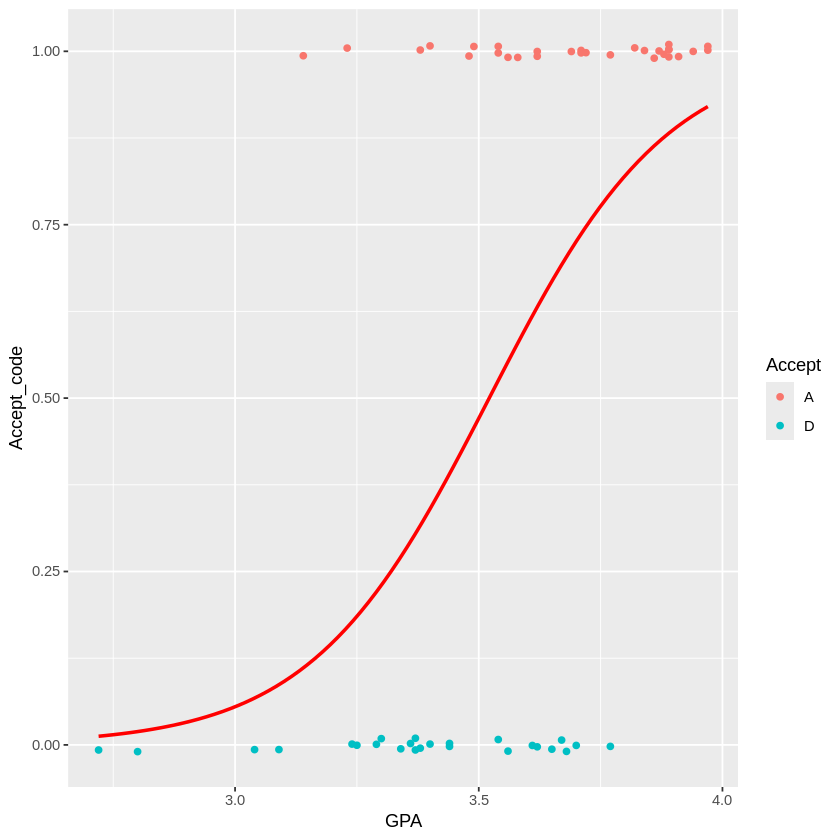

In [14]:
## Professor's code

mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)
